# 1. Introduction
## 1.1. Problem Statement
The goal is to use the provided data set to predict the price of a house given various features such as the shape and size of the property, how many bedrooms and bathrooms it has, whether it has a fireplace, garage, basement, or pool, the year it was modeled, and many others.

## 1.2. Data Description
Below is a list of the independent variables to be used to predict the target variable `SalePrice`:
1. **MSSubClass:** Identifies the type of dwelling involved in the sale.	
2. **MSZoning:** Identifies the general zoning classification of the sale.	
3. **LotFrontage:** Linear feet of street connected to property
4. **LotArea:** Lot size in square feet
5. **Street:** Type of road access to property
6. **Alley:** Type of alley access to property
7. **LotShape:** General shape of property
8. **LandContour:** Flatness of the property
9. **Utilities:** Type of utilities available
10. **LotConfig:** Lot configuration
11. **LandSlope:** Slope of property
12. **Neighborhood:** Physical locations within Ames city limits
13. **Condition1:** Proximity to various conditions
14. **Condition2:** Proximity to various conditions (if more than one is present)
15. **BldgType:** Type of dwelling
16. **HouseStyle:** Style of dwelling
17. **OverallQual:** Rates the overall material and finish of the house
18. **OverallCond:** Rates the overall condition of the house
19. **YearBuilt:** Original construction date
20. **YearRemodAdd:** Remodel date (same as construction date if no remodeling or additions)
21. **RoofStyle:** Type of roof
22. **RoofMatl:** Roof material
23. **Exterior1st:** Exterior covering on house
24. **Exterior2nd:** Exterior covering on house (if more than one material)
25. **MasVnrType:** Masonry veneer type
26. **MasVnrArea:** Masonry veneer area in square feet
27. **ExterQual:** Evaluates the quality of the material on the exterior 
28. **ExterCond:** Evaluates the present condition of the material on the exterior
29. **Foundation:** Type of foundation
30. **BsmtQual:** Evaluates the height of the basement
31. **BsmtCond:** Evaluates the general condition of the basement
32. **BsmtExposure:** Refers to walkout or garden level walls
33. **BsmtFinType1:** Rating of basement finished area
34. **BsmtFinSF1:** Type 1 finished square feet
35. **BsmtFinType2:** Rating of basement finished area (if multiple types)
36. **BsmtFinSF2:** Type 2 finished square feet
37. **BsmtUnfSF:** Unfinished square feet of basement area
38. **TotalBsmtSF:** Total square feet of basement area
39. **Heating:** Type of heating
40. **HeatingQC:** Heating quality and condition
41. **CentralAir:** Central air conditioning
42. **Electrical:** Electrical system
43. **1stFlrSF:** First Floor square feet
44. **2ndFlrSF:** Second floor square feet
45. **LowQualFinSF:** Low quality finished square feet (all floors)
46. **GrLivArea:** Above grade (ground) living area square feet
47. **BsmtFullBath:** Basement full bathrooms
48. **BsmtHalfBath:** Basement half bathrooms
49. **FullBath:** Full bathrooms above grade
50. **HalfBath:** Half baths above grade
51. **Bedroom:** Bedrooms above grade (does NOT include basement bedrooms)
52. **Kitchen:** Kitchens above grade
53. **KitchenQual:** Kitchen quality
54. **TotRmsAbvGrd:** Total rooms above grade (does not include bathrooms)
55. **Functional:** Home functionality (Assume typical unless deductions are warranted)
56. **Fireplaces:** Number of fireplaces
57. **FireplaceQu:** Fireplace quality
58. **GarageType:** Garage location
59. **GarageYrBlt:** Year garage was built
60. **GarageFinish:** Interior finish of the garage
61. **GarageCars:** Size of garage in car capacity
62. **GarageArea:** Size of garage in square feet
63. **GarageQual:** Garage quality
64. **GarageCond:** Garage condition
65. **PavedDrive:** Paved driveway
66. **WoodDeckSF:** Wood deck area in square feet
67. **OpenPorchSF:** Open porch area in square feet
68. **EnclosedPorch:** Enclosed porch area in square feet
69. **3SsnPorch:** Three season porch area in square feet
70. **ScreenPorch:** Screen porch area in square feet
71. **PoolArea:** Pool area in square feet
72. **PoolQC:** Pool quality
73. **Fence:** Fence quality
74. **MiscFeature:** Miscellaneous feature not covered in other categories
75. **MiscVal:** Value of miscellaneous feature
76. **MoSold:** Month Sold (MM)
77. **YrSold:** Year Sold (YYYY)
78. **SaleType:** Type of sale
79. **SaleCondition:** Condition of sale

## 1.3. Methodology
1. Introduction
2. Data Preparation
    - Loading libraries & data
    - Data cleaning
    - Feature Engineering
3. Exploratory Data Analysis
4. Modeling
    - Decision trees
    - Random forest
    - Support vector machine
    - K-nearest neighbor
    - XGBoost
    - LightGBM
5. Hyperparameter Tuning
6. Summary & Recommendations

# 2. Data Preparation

## 2.1. Loading libraries & data

In [1]:
# load libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# configure settings to display all rows and columns
%matplotlib inline
pd.set_option("display.max.rows", None)
pd.set_option("display.max.columns", None)

# ignore warning messages
import warnings
warnings.filterwarnings('ignore')

# set default figure size
from matplotlib import rcParams
rcParams['figure.figsize'] = (8, 6)

In [2]:
# load training data
train = pd.read_csv('train.csv', index_col = 'Id')

# loading test data
test = pd.read_csv('test.csv', index_col = 'Id')

# get shape of both data sets
print("Train data set shape:", train.shape)
print("Test data set shape:", test.shape)

Train data set shape: (1460, 80)
Test data set shape: (1459, 79)


In [3]:
# previewing the train data set
train.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [4]:
# previewing the test data set
test.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [5]:
# extracting the target variable
target = train[['SalePrice']]

# removing the target variable from the train data set 
train.drop(columns = ['SalePrice'], inplace = True)

# concatenating both the train and test data sets into a new data set
df = pd.concat([train, test])
df.sample(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1512,20,RL,88.0,9680,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1967,1967,Gable,CompShg,Wd Sdng,Plywood,BrkFace,268.0,TA,TA,CBlock,TA,TA,No,BLQ,1010.0,Unf,0.0,500.0,1510.0,GasA,Ex,Y,SBrkr,1510,0,0,1510,1.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Attchd,1967.0,RFn,2.0,517.0,TA,TA,Y,0,40,0,0,204,0,NaN,GdPrv,NaN,0,4,2010,WD,Normal
593,20,RL,60.0,6600,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,8,1982,2003,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Gd,PConc,TA,Gd,No,GLQ,816.0,Unf,0.0,0.0,816.0,GasA,Ex,Y,SBrkr,816,0,0,816,1.0,0.0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1985.0,Fin,2.0,816.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal
735,20,RL,NaN,8978,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,1968,1968,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,PConc,TA,TA,No,Unf,0.0,Unf,0.0,948.0,948.0,GasA,TA,Y,SBrkr,948,0,0,948,0.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1968.0,Unf,1.0,300.0,TA,TA,Y,147,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Family
1985,120,RL,NaN,3940,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Blmngtn,Norm,Norm,TwnhsE,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,143.0,Gd,TA,PConc,Gd,TA,Gd,GLQ,1073.0,Unf,0.0,342.0,1415.0,GasA,Ex,Y,SBrkr,1455,0,0,1455,1.0,0.0,2,0,2,1,Gd,6,Typ,1,TA,Attchd,2003.0,Fin,3.0,644.0,TA,TA,Y,156,20,0,0,144,0,NaN,NaN,NaN,0,8,2008,WD,Normal
2820,20,RL,75.0,9375,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,5,1954,1954,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,CBlock,TA,TA,No,Rec,799.0,Unf,0.0,168.0,967.0,GasA,Ex,Y,SBrkr,1350,0,0,1350,0.0,0.0,1,1,3,1,TA,6,Typ,1,Gd,Attchd,1954.0,RFn,2.0,504.0,TA,TA,Y,237,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2656,60,RL,120.0,13975,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,BrkFace,525.0,Gd,TA,PConc,Gd,TA,Av,Unf,0.0,Unf,0.0,1090.0,1090.0,GasA,Ex,Y,SBrkr,1117,1089,0,2206,0.0,0.0,2,1,4,1,Ex,10,Typ,1,Gd,BuiltIn,2005.0,Fin,3.0,670.0,TA,TA,Y,148,95,0,0,0,0,NaN,NaN,NaN,0,8,2006,New,Partial
1259,80,RL,59.0,9587,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,SLvl,7,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,Stone,182.0,Gd,TA,PConc,Gd,TA,Gd,GLQ,655.0,Unf,0.0,201.0,856.0,GasA,Ex,Y,SBrkr,1166,0,0,1166,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,2005.0,Fin,2.0,400.0,TA,TA,Y,212,0,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal
1546,50,RM,50.0,6000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Fin,6,6,1940,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,CBlock,TA,TA,No,LwQ,264.0,Unf,0.0,308.0,572.0,GasA,Ex,Y,FuseA,848,348,0,1196,0.0,1.0,1,1,3,1,TA,6,Typ,2,Gd,Detchd,1973.0,Unf,2.0,576.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,Normal
2014,60,RL,50.0,8480,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,2Story,6,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,120.0,Gd,TA,PConc,Gd,TA,No,GLQ,602.0,Unf,0.0,284.0,886.0,GasA,Ex,Y,SBrkr,886,794,0,1680,0.0,1.0,2,1,3,1,Gd,7,Typ,0,NaN,Attchd,1993.0,RFn,2.0,474.0,TA,TA,Y,144,96,0,0,0,0,NaN,NaN,NaN,0,10,2008,WD,Normal


In [6]:
# check shape of new data set
df.shape

(2919, 79)

In [7]:
# preview summary of basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

We see that many variables have missing values which will need to be removed. In addition to that, some variables are of numeric data type when they should be categorical.

## 2.2 Data Cleaning

In [8]:
# converting some numerical variables into object data type
df['MSSubClass'] = df['MSSubClass'].astype('object')
df['OverallQual'] = df['OverallQual'].astype('object')
df['OverallCond'] = df['OverallCond'].astype('object')
df['YearBuilt'] = df['YearBuilt'].astype('object')
df['YearRemodAdd'] = df['YearRemodAdd'].astype('object')
df['MoSold'] = df['MoSold'].astype('object')
df['YrSold'] = df['YrSold'].astype('object')

In [9]:
# calculate percentage of missing values per column
cols = df.columns
missing_values = {}

for col in cols:
    num_missing = df[col].isna().sum()
    perc_missing = round(num_missing / df.shape[0] * 100, 2)
    
    if perc_missing > 0:
        missing_values[col] = perc_missing

for col in missing_values:
    print(f"Column: {col} \t\t Percentage missing: {missing_values[col]}")

Column: MSZoning 		 Percentage missing: 0.14
Column: LotFrontage 		 Percentage missing: 16.65
Column: Alley 		 Percentage missing: 93.22
Column: Utilities 		 Percentage missing: 0.07
Column: Exterior1st 		 Percentage missing: 0.03
Column: Exterior2nd 		 Percentage missing: 0.03
Column: MasVnrType 		 Percentage missing: 0.82
Column: MasVnrArea 		 Percentage missing: 0.79
Column: BsmtQual 		 Percentage missing: 2.77
Column: BsmtCond 		 Percentage missing: 2.81
Column: BsmtExposure 		 Percentage missing: 2.81
Column: BsmtFinType1 		 Percentage missing: 2.71
Column: BsmtFinSF1 		 Percentage missing: 0.03
Column: BsmtFinType2 		 Percentage missing: 2.74
Column: BsmtFinSF2 		 Percentage missing: 0.03
Column: BsmtUnfSF 		 Percentage missing: 0.03
Column: TotalBsmtSF 		 Percentage missing: 0.03
Column: Electrical 		 Percentage missing: 0.03
Column: BsmtFullBath 		 Percentage missing: 0.07
Column: BsmtHalfBath 		 Percentage missing: 0.07
Column: KitchenQual 		 Percentage missing: 0.03
Column: F

According to the Data Description, the following variables can include a "N/A" option:
- Alley
- BsmtQual
- BsmtCond
- BsmtExposure
- BsmtFinType1
- BsmtFinType2
- FireplaceQu
- GarageType
- GarageFinish
- GarageQual
- GarageCond
- PoolQC
- Fence
- MiscFeature

In addition to all these, we are told to assume a "Typ" value for the `Functional` variable unless deductions are warranted.

Furthermore, we can use other related variables to determine what the missing value in a particular variable should be. For example, if there is a missing value in the `GarageYrBlt` variable, we can look at records that have the same values in `GarageType`, `GarageFinish`, `GarageCars`, `GarageArea`, `GarageQual`, and `GarageCond`.

In [10]:
apply_na_values = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
                   'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 
                   'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']

for col in apply_na_values:
    df[col].fillna("N/A", inplace = True)
    
df.Functional.fillna("Typ", inplace = True)

In [11]:
# looking at more null values related to basements
cond1 = (df.BsmtFinSF1.isna()) | (df.BsmtFinSF2.isna())
cond2 = (df.BsmtUnfSF.isna()) | (df.TotalBsmtSF.isna())
cond3 = (df.BsmtFullBath.isna()) | (df.BsmtHalfBath.isna())
basement = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
            'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']

df.loc[cond1 | cond2 | cond3][basement]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
Id,,,,,,,,,,,
2121,N/A,N/A,N/A,N/A,NaN,N/A,NaN,NaN,NaN,NaN,NaN
2189,N/A,N/A,N/A,N/A,0.0,N/A,0.0,0.0,0.0,NaN,NaN


Using common sense, we can deduce that the missing values should be 0. After all, if there are no basements, there's no need for data such as its square feet.

In [12]:
basement_num = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']

for col in basement_num:
    df[col].fillna(0, inplace = True)

In [13]:
# checking missing garage data
garage = ['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']
cond = (df.GarageYrBlt.isna()) | (df.GarageCars.isna()) | (df.GarageArea.isna())
df.loc[cond][garage]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
Id,,,,,,,
40,N/A,NaN,N/A,0.0,0.0,N/A,N/A
49,N/A,NaN,N/A,0.0,0.0,N/A,N/A
79,N/A,NaN,N/A,0.0,0.0,N/A,N/A
89,N/A,NaN,N/A,0.0,0.0,N/A,N/A
90,N/A,NaN,N/A,0.0,0.0,N/A,N/A
100,N/A,NaN,N/A,0.0,0.0,N/A,N/A
109,N/A,NaN,N/A,0.0,0.0,N/A,N/A
126,N/A,NaN,N/A,0.0,0.0,N/A,N/A
128,N/A,NaN,N/A,0.0,0.0,N/A,N/A


Again, using common sense, we can deduce that if the other garage variables have null or N/A values, it makes no sense to have garage data. For example, if `GarageType`, `GarageFinish`, `GarageCars`, `GarageArea`, `GarageQual`, and `GarageCond` are all null, then that means there should be no values for the `GarageYrBlt` variable. In other words, the garage for that particular house does not exist.

In [14]:
garage_num = ['GarageYrBlt', 'GarageCars', 'GarageArea']

for col in garage_num:
    df[col].fillna(0, inplace = True)

In [15]:
# checking data relevant to MSZoning 
area = ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 
        'LotConfig', 'LandSlope', 'Neighborhood']
df.loc[df.MSZoning.isna()][area]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood
Id,,,,,,,,,,,,
1916,30,NaN,109.0,21780,Grvl,N/A,Reg,Lvl,NaN,Inside,Gtl,IDOTRR
2217,20,NaN,80.0,14584,Pave,N/A,Reg,Low,AllPub,Inside,Mod,IDOTRR
2251,70,NaN,NaN,56600,Pave,N/A,IR1,Low,AllPub,Inside,Gtl,IDOTRR
2905,20,NaN,125.0,31250,Pave,N/A,Reg,Lvl,AllPub,Inside,Gtl,Mitchel


In [16]:
# looking at records where LotArea is between 14584 and 56600, Alley is N/A, and LotConfig is Inside
cond1 = (df.LotArea >= 14584) | (df.LotArea <= 56600)
cond2 = (df.Alley == "N/A") | (df.LotConfig == "Inside")

# look at all records that satisfy these conditions
z = df.loc[cond1 | cond2][area]
z

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood
Id,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,N/A,Reg,Lvl,AllPub,Inside,Gtl,CollgCr
2,20,RL,80.0,9600,Pave,N/A,Reg,Lvl,AllPub,FR2,Gtl,Veenker
3,60,RL,68.0,11250,Pave,N/A,IR1,Lvl,AllPub,Inside,Gtl,CollgCr
4,70,RL,60.0,9550,Pave,N/A,IR1,Lvl,AllPub,Corner,Gtl,Crawfor
5,60,RL,84.0,14260,Pave,N/A,IR1,Lvl,AllPub,FR2,Gtl,NoRidge
6,50,RL,85.0,14115,Pave,N/A,IR1,Lvl,AllPub,Inside,Gtl,Mitchel
7,20,RL,75.0,10084,Pave,N/A,Reg,Lvl,AllPub,Inside,Gtl,Somerst
8,60,RL,NaN,10382,Pave,N/A,IR1,Lvl,AllPub,Corner,Gtl,NWAmes
9,50,RM,51.0,6120,Pave,N/A,Reg,Lvl,AllPub,Inside,Gtl,OldTown


In [17]:
# replace the missing MSZoning values with the mode
df.MSZoning.fillna(z.MSZoning.mode()[0], inplace = True)

In [18]:
# replacing the variables with less than 10% missing values with their respective modes
df.Exterior1st.fillna(df.Exterior1st.mode()[0], inplace = True)
df.Exterior2nd.fillna(df.Exterior2nd.mode()[0], inplace = True)
df.Utilities.fillna(df.Utilities.mode()[0], inplace = True)
df.MasVnrType.fillna(df.MasVnrType.mode()[0], inplace = True)
df.MasVnrArea.fillna(df.MasVnrArea.mode()[0], inplace = True)
df.Electrical.fillna(df.Electrical.mode()[0], inplace = True)
df.KitchenQual.fillna(df.KitchenQual.mode()[0], inplace = True)
df.SaleType.fillna(df.SaleType.mode()[0], inplace = True)

Finally, for `LotFrontage` we will use KNN Imputer to select the best values for its missing values. Since KNN Imputer requires the variable to be imputed to be at least partially dependent on the other variables in the dataset, we will create a subset containing the variables we think are best related to the `LotFrontage` variable.

We will then encode the categorical variables using LabelEncoder and scale using MinMaxScaler before applying the imputer.

In [19]:
subset = df[['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle']]
subset.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle
Id,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,N/A,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story
2,20,RL,80.0,9600,Pave,N/A,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story
3,60,RL,68.0,11250,Pave,N/A,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story
4,70,RL,60.0,9550,Pave,N/A,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story
5,60,RL,84.0,14260,Pave,N/A,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story


In [20]:
subset.dtypes

MSSubClass       object
MSZoning         object
LotFrontage     float64
LotArea           int64
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
dtype: object

In [21]:
from sklearn.preprocessing import LabelEncoder

# categorical columns to encode
to_encode = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
             'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 
             'Condition2', 'BldgType', 'HouseStyle']

# dictionary to store the classes after encoding
class_dict = {}

for col in to_encode:
    le = LabelEncoder().fit(subset[col].unique()) # fits the encoder to the column's unique values
    class_dict[col] = le.classes_
    subset[col] = le.transform(subset[col].values) # applies the encoding to that column
    
subset.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle
Id,,,,,,,,,,,,,,,,
1,5,3,65.0,8450,1,1,3,3,0,4,0,5,2,2,0,5
2,0,3,80.0,9600,1,1,3,3,0,2,0,24,1,2,0,2
3,5,3,68.0,11250,1,1,0,3,0,4,0,5,2,2,0,5
4,6,3,60.0,9550,1,1,0,3,0,0,0,6,2,2,0,5
5,5,3,84.0,14260,1,1,0,3,0,2,0,15,2,2,0,5
6,4,3,85.0,14115,1,1,0,3,0,4,0,11,2,2,0,0
7,0,3,75.0,10084,1,1,3,3,0,4,0,21,2,2,0,2
8,5,3,NaN,10382,1,1,0,3,0,0,0,14,4,2,0,5
9,4,4,51.0,6120,1,1,3,3,0,4,0,17,0,2,0,0


In [22]:
# in case you want to retrieve (decode) the original value
print(class_dict['MSZoning'][3])
print(class_dict['Alley'][1])
print(class_dict['LandContour'][3])

RL
N/A
Lvl


In [23]:
# scaling the subset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

subset = pd.DataFrame(scaler.fit_transform(subset), columns = subset.columns, index = subset.index)
subset.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle
Id,,,,,,,,,,,,,,,,
1,0.333333,0.75,0.150685,0.033420,1.0,0.5,1.0,1.0,0.0,1.0,0.0,0.208333,0.250,0.285714,0.00,0.714286
2,0.000000,0.75,0.202055,0.038795,1.0,0.5,1.0,1.0,0.0,0.5,0.0,1.000000,0.125,0.285714,0.00,0.285714
3,0.333333,0.75,0.160959,0.046507,1.0,0.5,0.0,1.0,0.0,1.0,0.0,0.208333,0.250,0.285714,0.00,0.714286
4,0.400000,0.75,0.133562,0.038561,1.0,0.5,0.0,1.0,0.0,0.0,0.0,0.250000,0.250,0.285714,0.00,0.714286
5,0.333333,0.75,0.215753,0.060576,1.0,0.5,0.0,1.0,0.0,0.5,0.0,0.625000,0.250,0.285714,0.00,0.714286
6,0.266667,0.75,0.219178,0.059899,1.0,0.5,0.0,1.0,0.0,1.0,0.0,0.458333,0.250,0.285714,0.00,0.000000
7,0.000000,0.75,0.184932,0.041057,1.0,0.5,1.0,1.0,0.0,1.0,0.0,0.875000,0.250,0.285714,0.00,0.285714
8,0.333333,0.75,NaN,0.042450,1.0,0.5,0.0,1.0,0.0,0.0,0.0,0.583333,0.500,0.285714,0.00,0.714286
9,0.266667,1.00,0.102740,0.022529,1.0,0.5,1.0,1.0,0.0,1.0,0.0,0.708333,0.000,0.285714,0.00,0.000000


In [24]:
# imputing
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors = 5)
subset = pd.DataFrame(imputer.fit_transform(subset), columns = subset.columns, index = subset.index)

# reversing the scaling so that we get the original values
subset = pd.DataFrame(scaler.inverse_transform(subset), columns = subset.columns, index = subset.index)
subset.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle
Id,,,,,,,,,,,,,,,,
1,5.0,3.0,65.0,8450.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0
2,0.0,3.0,80.0,9600.0,1.0,1.0,3.0,3.0,0.0,2.0,0.0,24.0,1.0,2.0,0.0,2.0
3,5.0,3.0,68.0,11250.0,1.0,1.0,0.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0
4,6.0,3.0,60.0,9550.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,6.0,2.0,2.0,0.0,5.0
5,5.0,3.0,84.0,14260.0,1.0,1.0,0.0,3.0,0.0,2.0,0.0,15.0,2.0,2.0,0.0,5.0
6,4.0,3.0,85.0,14115.0,1.0,1.0,0.0,3.0,0.0,4.0,0.0,11.0,2.0,2.0,0.0,0.0
7,0.0,3.0,75.0,10084.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,21.0,2.0,2.0,0.0,2.0
8,5.0,3.0,111.6,10382.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,14.0,4.0,2.0,0.0,5.0
9,4.0,4.0,51.0,6120.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,17.0,0.0,2.0,0.0,0.0


In [25]:
# replacing the LotFrontage values in the main data set with these new values
df['LotFrontage'] = subset['LotFrontage'].values

# confirming our data set does not have any missing values
df.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

## 2.3. Feature Engineering

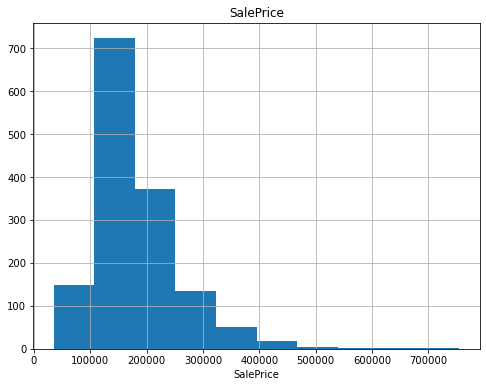

In [26]:
# plotting the histogram of our target variable
target.hist()
plt.xlabel("SalePrice")
plt.show()

Our target variable is positively skewed (the tail end points to the right). We will apply **log** to normalize it.

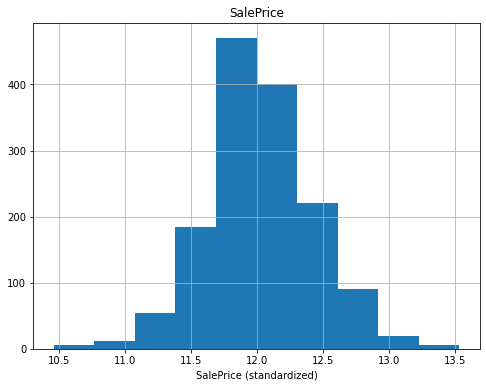

In [27]:
target_log = np.log(target)
target_log.hist()
plt.xlabel("SalePrice (standardized)")
plt.show()

In [28]:
# generating new features that group together related variables
df['StreetAlley'] = df['Street'] + ' - ' + df["Alley"]
df['LotShapeConfig'] = df['LotShape'] + ' - ' + df["LotConfig"]
df['LandContourSlope'] = df['LandContour'] + ' - ' + df["LandSlope"]
df['Conditions'] = df['Condition1'] + ' - ' + df["Condition2"]
df['DwellingTypeStyle'] = df['BldgType'] + ' - ' + df["HouseStyle"]
df['RoofStyleMat'] = df['RoofStyle'] + ' - ' + df["RoofMatl"]
df['Exteriors'] = df['Exterior1st'] + ' - ' + df["Exterior2nd"]
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
df['TotalBath'] = df['BsmtFullBath'] + df['BsmtHalfBath'] + df['FullBath'] + df['HalfBath']
df['TotalPorchSF'] = df['WoodDeckSF'] + df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch']

# create Extras variable consisting of whether the house has a pool, fence, or misc. features
criteria = [
    ((df.PoolQC == 'N/A') & (df.Fence == "N/A") & (df.MiscFeature == "N/A")),
    ((df.PoolQC != 'N/A') & (df.Fence == "N/A") & (df.MiscFeature == "N/A")),
    ((df.PoolQC == 'N/A') & (df.Fence != "N/A") & (df.MiscFeature == "N/A")),
    ((df.PoolQC == 'N/A') & (df.Fence == "N/A") & (df.MiscFeature != "N/A")),
    ((df.PoolQC != 'N/A') & (df.Fence != "N/A") & (df.MiscFeature == "N/A")),
    ((df.PoolQC != 'N/A') & (df.Fence == "N/A") & (df.MiscFeature != "N/A")),
    ((df.PoolQC == 'N/A') & (df.Fence != "N/A") & (df.MiscFeature != "N/A")),
    ((df.PoolQC != 'N/A') & (df.Fence != "N/A") & (df.MiscFeature != "N/A")),
]
labels = ['N/A', 'Pool', 'Fence', 'Misc. Features', 'Pool + Fence', 'Pool + Misc. Features', 'Fence + Misc. Features',
         'Pool + Fence + Misc. Features']
df['Extras'] = np.select(criteria, labels)

# creating a year range where each year is added to one of 4 groups
criteria = [
    ((df.YearRemodAdd >= 1872) & (df.YearRemodAdd < 1900)),
    ((df.YearRemodAdd >= 1900) & (df.YearRemodAdd < 1950)),
    ((df.YearRemodAdd >= 1950) & (df.YearRemodAdd < 2000)),
    (df.YearRemodAdd >= 2000)    
]
labels = ['1872-1899', '1900-1949', '1950-1999', '2000-2010']
df['YearBuiltRange'] = np.select(criteria, labels)

# grouping neighborhoods together based on region
criteria = [
    # NORTH
    ((df.Neighborhood == 'ClearCr') | (df.Neighborhood == 'NridgHt') | (df.Neighborhood == 'NoRidge') | 
    (df.Neighborhood == 'Blmngtn') | (df.Neighborhood == 'BrDale') | (df.Neighborhood == 'Gilbert') | 
    (df.Neighborhood == 'StoneBr') | (df.Neighborhood == 'NAmes') | (df.Neighborhood == 'Somerst') | 
    (df.Neighborhood == 'Veenker') | (df.Neighborhood == 'NPkVill') | (df.Neighborhood == 'NWAmes')),
    # WEST
    ((df.Neighborhood == 'SawyerW') | (df.Neighborhood == 'Edwards') | (df.Neighborhood == 'CollgCr') | 
     (df.Neighborhood == 'Sawyer')),
    # SOUTH 
    ((df.Neighborhood == 'Mitchel') | (df.Neighborhood == 'MeadowV') | (df.Neighborhood == 'Timber')),
    # CENTRAL
    ((df.Neighborhood == 'Crawfor') | (df.Neighborhood == 'OldTown') | (df.Neighborhood == 'BrkSide') | 
    (df.Neighborhood == 'SWISU') | (df.Neighborhood == 'Blueste') | (df.Neighborhood == 'IDOTRR'))
]
labels = ["North", "West", "South", "Central"]
df['NeighborhoodRegion'] = np.select(criteria, labels)

# deleting the unnecessary features
df.drop(columns = ['LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
                   'HouseStyle', 'YearBuilt', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'RoofMatl', 'BsmtFinSF1', 'BsmtFinSF2',
                   'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
                   '2ndFlrSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 
                   '3SsnPorch', 'ScreenPorch', 'PoolQC', 'Fence', 'MiscFeature'], inplace = True)

df.shape

(2919, 60)

In [29]:
# previewing a sample
df.sample(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,Utilities,OverallQual,OverallCond,YearRemodAdd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,StreetAlley,LotShapeConfig,LandContourSlope,Conditions,DwellingTypeStyle,RoofStyleMat,Exteriors,TotalSF,TotalBath,TotalPorchSF,Extras,YearBuiltRange,NeighborhoodRegion
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1685,60,RL,57.0,8918,Pave,N/A,AllPub,6,5,2006,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,Unf,GasA,Ex,Y,SBrkr,0,1490,3,1,Gd,7,Typ,1,Gd,Attchd,2005.0,Fin,2.0,392.0,TA,TA,Y,0,0,7,2009,WD,Normal,Pave - N/A,IR1 - Inside,Lvl - Gtl,Norm - Norm,1Fam - 2Story,Gable - CompShg,VinylSd - VinylSd,2235.0,3.0,56,N/A,2000-2010,North
1793,20,RL,77.0,11500,Pave,N/A,AllPub,6,4,1967,None,0.0,Fa,TA,CBlock,TA,Fa,No,BLQ,Rec,GasA,Gd,Y,SBrkr,0,1040,3,1,TA,6,Min1,1,Po,Attchd,1967.0,RFn,2.0,480.0,TA,TA,Y,0,0,5,2009,WD,Normal,Pave - N/A,IR1 - Inside,Lvl - Gtl,Norm - Norm,1Fam - 1Story,Gable - CompShg,HdBoard - HdBoard,2080.0,2.0,156,Fence,1950-1999,North
1638,60,RL,63.0,13250,Pave,N/A,AllPub,7,6,1978,BrkFace,256.0,TA,TA,CBlock,Gd,TA,No,Unf,Unf,GasA,TA,Y,SBrkr,0,2050,4,1,Gd,8,Typ,1,TA,Attchd,1978.0,RFn,2.0,529.0,TA,TA,Y,0,0,5,2009,WD,Abnorml,Pave - N/A,IR1 - Inside,Lvl - Gtl,RRNn - Norm,1Fam - 2Story,Gable - CompShg,HdBoard - HdBoard,2882.0,3.0,384,N/A,1950-1999,North


# 3. Exploratory Data Analysis

In [30]:
df.dtypes

MSSubClass             object
MSZoning               object
LotFrontage           float64
LotArea                 int64
Street                 object
Alley                  object
Utilities              object
OverallQual            object
OverallCond            object
YearRemodAdd           object
MasVnrType             object
MasVnrArea            float64
ExterQual              object
ExterCond              object
Foundation             object
BsmtQual               object
BsmtCond               object
BsmtExposure           object
BsmtFinType1           object
BsmtFinType2           object
Heating                object
HeatingQC              object
CentralAir             object
Electrical             object
LowQualFinSF            int64
GrLivArea               int64
BedroomAbvGr            int64
KitchenAbvGr            int64
KitchenQual            object
TotRmsAbvGrd            int64
Functional             object
Fireplaces              int64
FireplaceQu            object
GarageType

In [31]:
# selecting a few categorical and numerical variables to explore
categoricals = ['MSSubClass', 'MSZoning', 'DwellingTypeStyle', 'NeighborhoodRegion', 'YearBuiltRange', 'SaleType', 
                'Extras', 'YrSold']
numericals = ['LotArea', 'TotRmsAbvGrd', 'TotalBath' , 'GarageArea', 'TotalSF', 'TotalPorchSF']

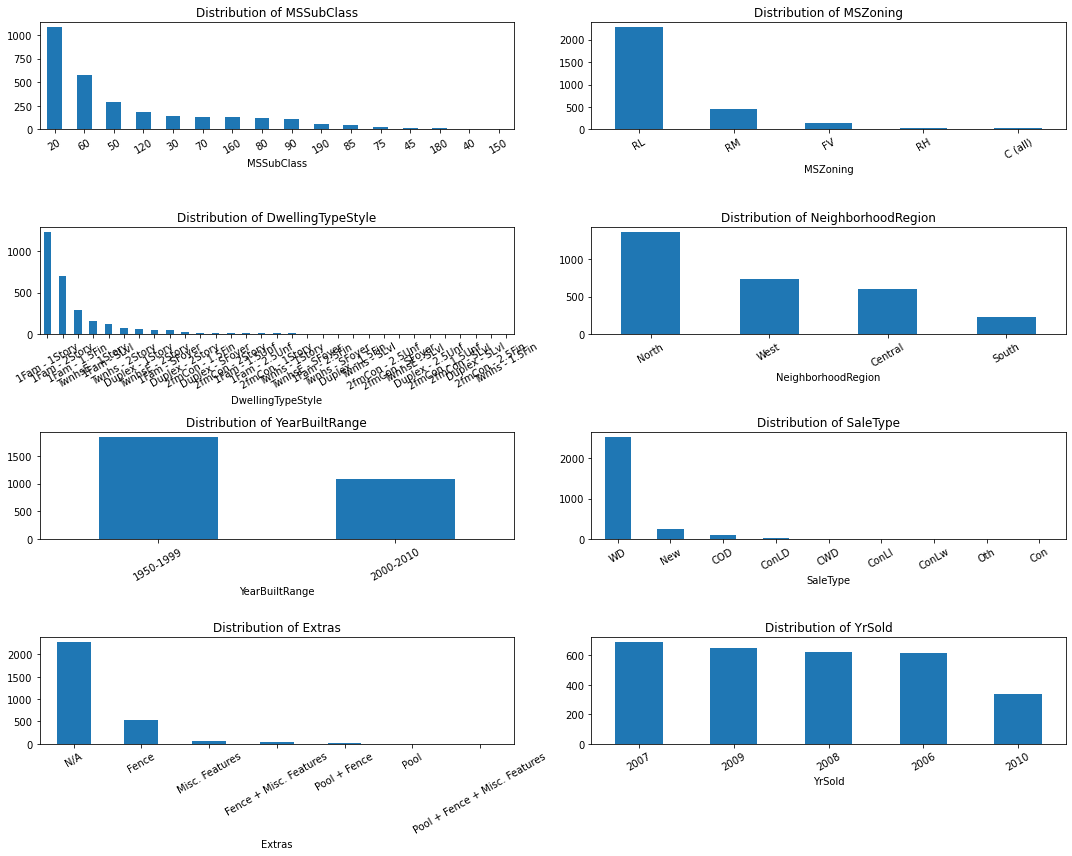

In [32]:
fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (15, 12))

for ax, col in zip(axes.flatten(), categoricals):
    df[col].value_counts().plot(kind = 'bar', ax = ax, rot = 30)
    ax.set_xlabel(f"{col}")
    ax.set_title(f"Distribution of {col}")
    
plt.tight_layout()

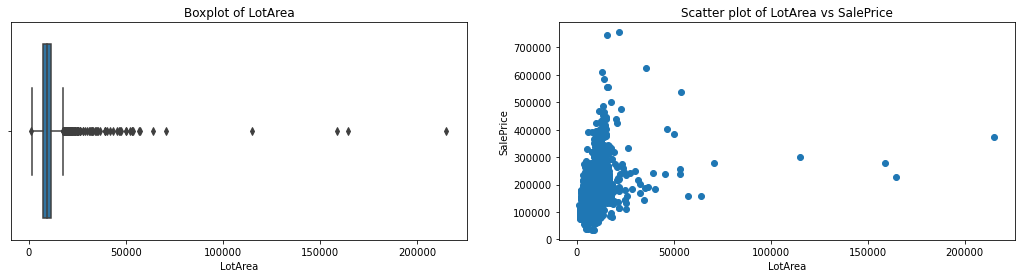

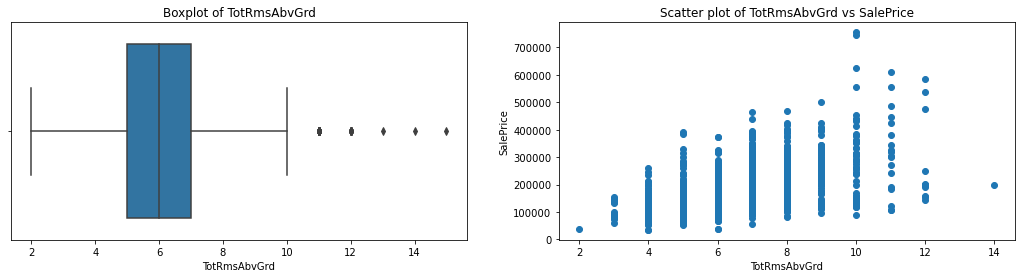

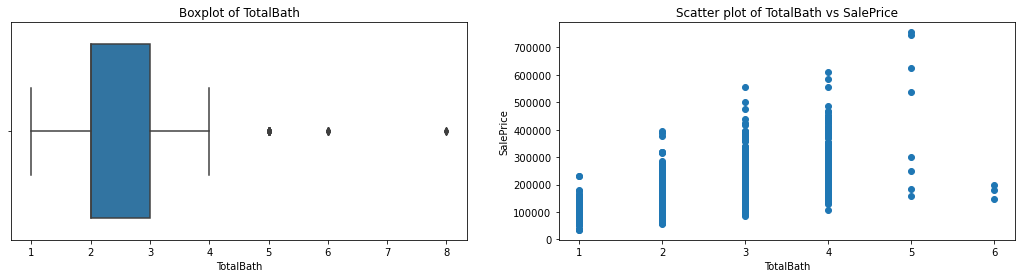

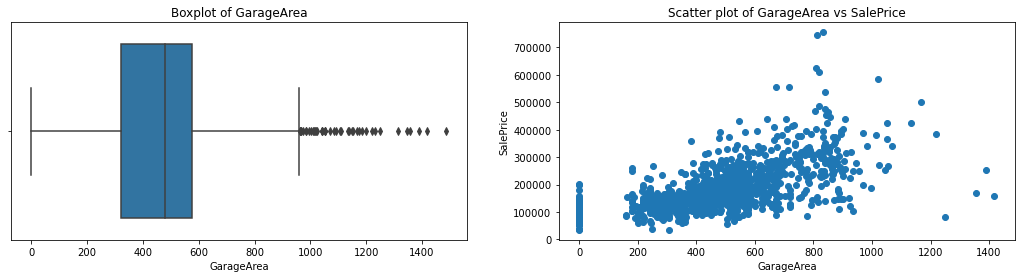

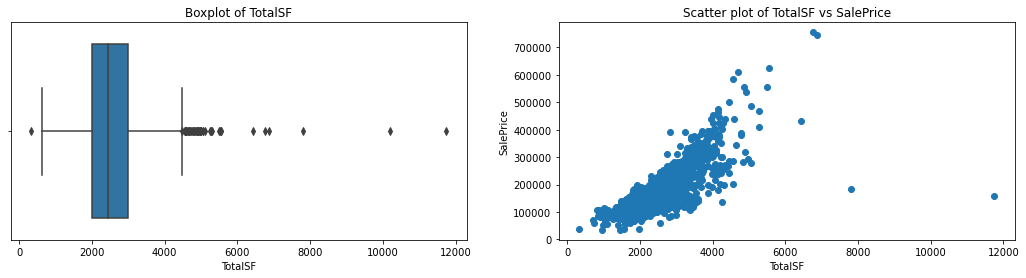

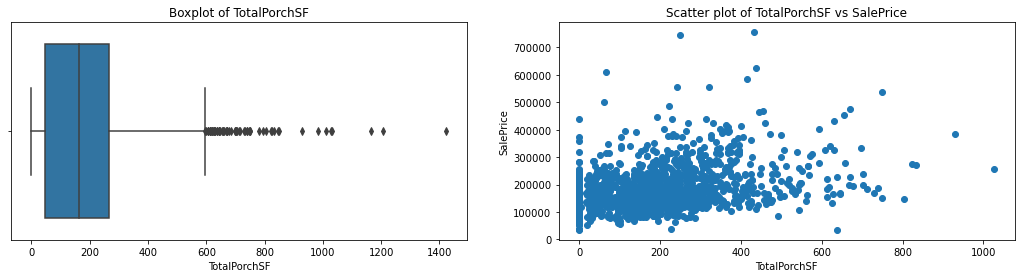

In [33]:
# distribution of the numericals
for col in numericals:    
    fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 4))
    
    plt.subplot(1, 2, 1)
    sns.boxplot(df[col])
    plt.title(f"Boxplot of {col}")
    
    plt.subplot(1, 2, 2)
    plt.scatter(x = df[col][:1460], y = target)
    plt.title(f"Scatter plot of {col} vs SalePrice")
    plt.xlabel(f"{col}")
    plt.ylabel("SalePrice")
    
plt.show()

In [34]:
# get all categorical variables to encode
to_encode = []
for col in df.columns:
    if df[col].dtype == 'O':
        to_encode.append(col)
        
class_dict = {}

# encoding the categorical variables
for col in to_encode:
    le = LabelEncoder().fit(df[col].unique())
    class_dict[col] = le.classes_
    df[col] = le.transform(df[col].values)

# confirming all variables are numerical
df.dtypes

MSSubClass              int32
MSZoning                int32
LotFrontage           float64
LotArea                 int64
Street                  int32
Alley                   int32
Utilities               int32
OverallQual             int32
OverallCond             int32
YearRemodAdd            int32
MasVnrType              int32
MasVnrArea            float64
ExterQual               int32
ExterCond               int32
Foundation              int32
BsmtQual                int32
BsmtCond                int32
BsmtExposure            int32
BsmtFinType1            int32
BsmtFinType2            int32
Heating                 int32
HeatingQC               int32
CentralAir              int32
Electrical              int32
LowQualFinSF            int64
GrLivArea               int64
BedroomAbvGr            int64
KitchenAbvGr            int64
KitchenQual             int32
TotRmsAbvGrd            int64
Functional              int32
Fireplaces              int64
FireplaceQu             int32
GarageType

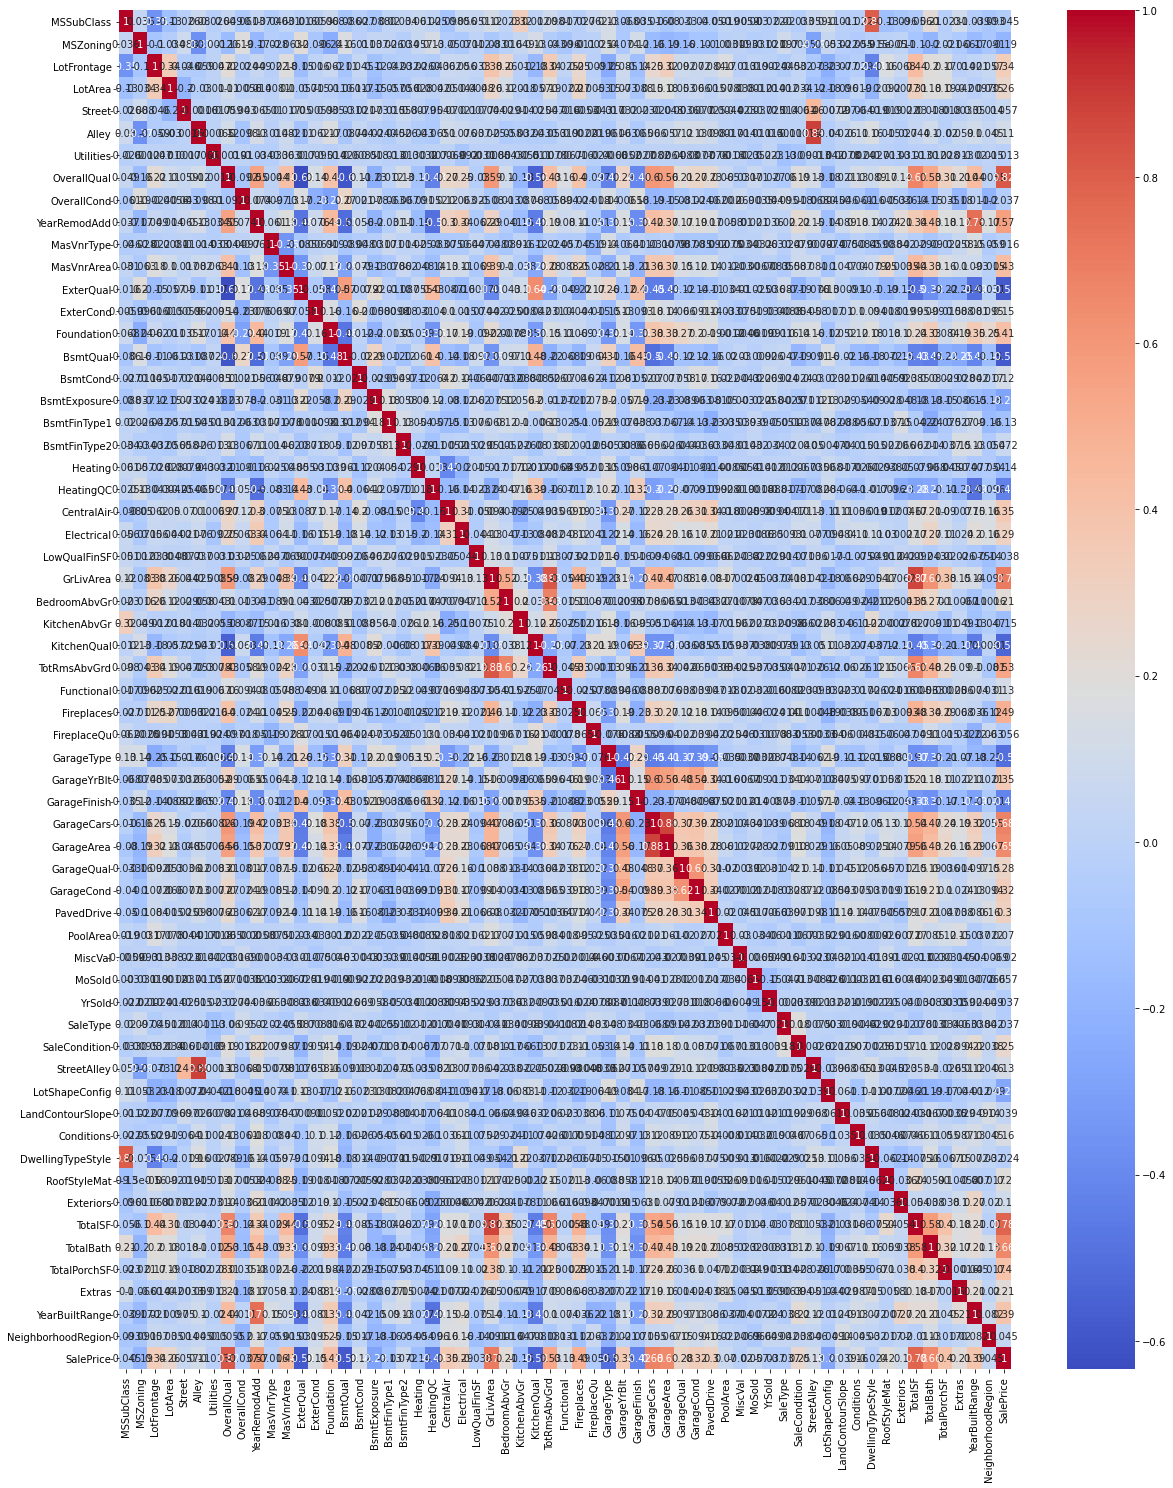

In [35]:
## WARNING: might take a while 
# looking at the correlation between variables
z = df[:1460] # train data only
z['SalePrice'] = target_log
corr = z.corr()

# using a heatmap to display the results
plt.figure(figsize = (20, 25))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.show()

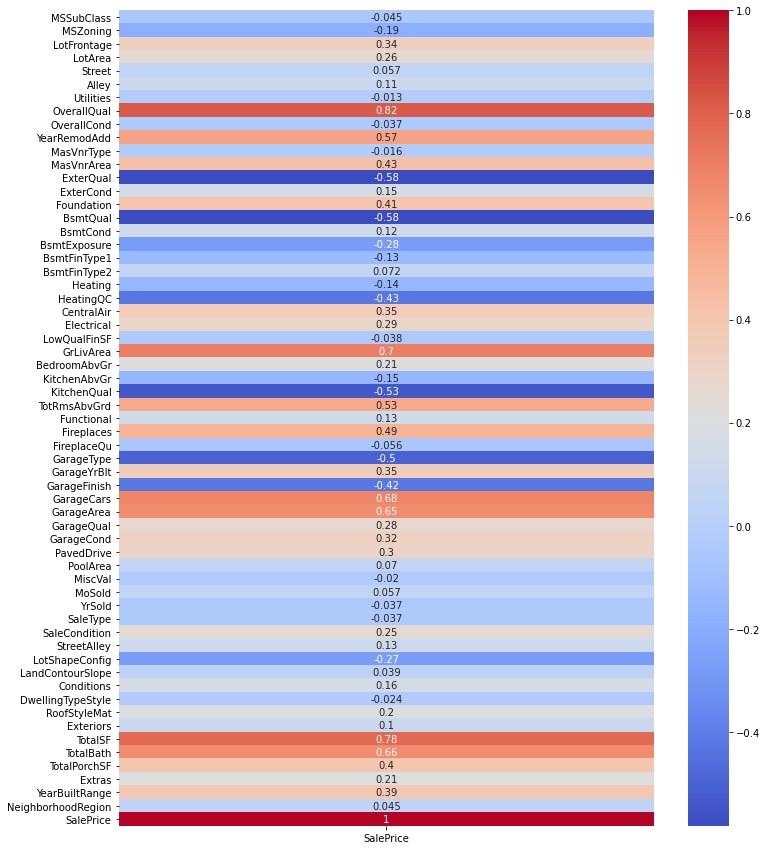

In [36]:
# getting a closer look between the target variable and the independent variables
plt.figure(figsize = (12, 15))
sns.heatmap(pd.DataFrame(corr['SalePrice'], index = corr.index), annot = True, cmap = "coolwarm")
plt.show()

Looking at the heatmap of the variables that correlate to our target variable (`SalePrice`), we can see that the following variables are moderately to highly positively correlated with the target variable:

    - TotalSF
    - TotalBath
    - GarageCars
    - GarageAreas
    - GrLivingArea
    - OverallQual
    - YearRemodAdd

Inversely, the following are moderately to strongly negatively correlated with the target variable:

    - GarageType
    - KitchenQual
    - BsmtQual
    - ExterQual

This means that the above listed variables have influence of varying degrees on `SalePrice`.

## 3.2 Summary of EDA
What this brief exploratory data analysis has shown us is:

    * there is no linearity
    * many of the categorical variables are unbalanced
    * there are outliers in the data
    * there is multicollinearity 

With this in mind, we can exempt regression algorithms that would be affected by this particular dataset such as linear regression. Alternatively, if you still want to use those regressors, you will have to take extra measures to prepare the data accordingly, such as dealing with outliers and multicollinearity.

# 4. Modeling

In [37]:
# set up X and y
X = df[:1460].values
y = target_log.values

In [38]:
# split into 80% training data and 20% test data
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2, random_state = 1)

In [39]:
# scale the independent features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

Before we can start modeling, it is important to understand the metric we will be using to assess the performance of our regressors called the ***Root Mean Squared Error (RMSE)***. 

RMSE is basically the square root of the ***Mean Squared Error (MSE)*** which is the mean of the squared sum of errors. In simpler terms, this means that you calculate the difference between the actual values and the predicted values (called the errors), square them, sum them up, and then divide by the number of observations/records present in the data set. 

There is no hard and fast rule for determining what the right RMSE value is, it depends with the data set and the target variable. However, it is generally accepted that the lower the RMSE score is, the better the model is performing. 

This article might explain it better: https://www.statology.org/what-is-a-good-rmse/

## 4.1. Modeling using decision trees

In [40]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train_sc, y_train)
dt_pred = dt.predict(X_test_sc)

# assessing the model's performance
from sklearn.metrics import mean_squared_error as mse
rmse = np.sqrt(mse(y_test, dt_pred))
print("RMSE:", rmse)

RMSE: 0.22036302349640546


In [41]:
# applying to the test set
x = df[1461:].values
x_sc = scaler.transform(x)

# create submission file containing Id and SalePrice
results_dt = pd.DataFrame([], index = df[1461:].index)
results_dt['SalePrice'] = np.exp(dt.predict(x_sc)) # reversing the log we applied on the target to get the original values
results_dt.reset_index(inplace = True)
results_dt.to_csv('dt.csv', index = False)

## 4.2. Modeling using random forest

In [42]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train_sc, y_train)
rf_pred = rf.predict(X_test_sc)

# assessing the model's performance
rmse = np.sqrt(mse(y_test, rf_pred))
print("RMSE:", rmse)

RMSE: 0.13908502879887688


In [43]:
# applying to the test set
x = df[1461:].values
x_sc = scaler.transform(x)

# create submission file containing Id and SalePrice
results_rf = pd.DataFrame([], index = df[1461:].index)
results_rf['SalePrice'] = np.exp(rf.predict(x_sc)) # reversing the log we applied on the target to get the original values
results_rf.reset_index(inplace = True)
results_rf.to_csv('rf.csv', index = False)

## 4.3. Modeling using support vector machine

In [44]:
from sklearn.svm import SVR
svm = SVR(kernel = 'poly')
svm.fit(X_train_sc, y_train)
svm_pred = svm.predict(X_test_sc)

# assessing the model's performance
rmse = np.sqrt(mse(y_test, svm_pred))
print("RMSE:", rmse)

RMSE: 0.19037200467582155


In [45]:
# applying to the test set
x = df[1461:].values
x_sc = scaler.transform(x)

# create submission file containing Id and SalePrice
results_svm = pd.DataFrame([], index = df[1461:].index)
results_svm['SalePrice'] = np.exp(svm.predict(x_sc)) # reversing the log we applied on the target to get the original values
results_svm.reset_index(inplace = True)
results_svm.to_csv('svm.csv', index = False)

## 4.4. Modeling using k-nearest neighbors

In [46]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train_sc, y_train)
knn_pred = knn.predict(X_test_sc)

# assessing the model's performance
rmse = np.sqrt(mse(y_test, knn_pred))
print("RMSE:", rmse)

RMSE: 0.19203721549082825


In [47]:
# applying to the test set
x = df[1461:].values
x_sc = scaler.transform(x)

# create submission file containing Id and SalePrice
results_knn = pd.DataFrame([], index = df[1461:].index)
results_knn['SalePrice'] = np.exp(knn.predict(x_sc)) # reversing the log we applied on the target to get the original values
results_knn.reset_index(inplace = True)
results_knn.to_csv('svm.csv', index = False)

## 4.5. Modeling using eXtreme Gradient Boost (XGB)

In [48]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train_sc, y_train)
xgb_pred = xgb.predict(X_test_sc)

# assessing the model's performance
rmse = np.sqrt(mse(y_test, xgb_pred))
print("RMSE:", rmse)

RMSE: 0.14647635811173731


In [49]:
# applying to the test set
x = df[1461:].values
x_sc = scaler.transform(x)

# create submission file containing Id and SalePrice
results_xgb = pd.DataFrame([], index = df[1461:].index)
results_xgb['SalePrice'] = np.exp(xgb.predict(x_sc)) # reversing the log we applied on the target to get the original values
results_xgb.reset_index(inplace = True)
results_xgb.to_csv('xgb.csv', index = False)

## 4.6. Modeling using Light Gradient Boosting Machine (LightGBM)

In [50]:
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor()
lgbm.fit(X_train_sc, y_train)
lgbm_pred = lgbm.predict(X_test_sc)

# assessing the model's performance
rmse = np.sqrt(mse(y_test, lgbm_pred))
print("RMSE:", rmse)

RMSE: 0.13152717314160875


In [51]:
# applying to the test set
x = df[1461:].values
x_sc = scaler.transform(x)

# create submission file containing Id and SalePrice
results_lgbm = pd.DataFrame([], index = df[1461:].index)
results_lgbm['SalePrice'] = np.exp(lgbm.predict(x_sc)) # reversing the log we applied on the target to get the original values
results_lgbm.reset_index(inplace = True)
results_lgbm.to_csv('lgbm.csv', index = False)

# 5. Hyperparameter Tuning
We have determined that the following are our top 3 best performing regressors:
- LightGBM
- Random Forest
- XGB
Now we will tune the parameters of Random Forest to see if we can get a better (lower) RMSE score.

In [52]:
## WARNING: might take a while 
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

# parameters to evaluate
params = {
    'criterion' : ['squared_error', 'mse', 'absolute_error', 'poisson'],
    'n_estimators' : [10, 100, 200, 500, 1000],
    'max_depth' : [None, 1, 10, 100, 500],
    'min_samples_split' : [2, 10, 50, 100, 200],
    'n_jobs' : [1, -1]
}

# split into 20 folds and apply randomized cross validation
random_search = RandomizedSearchCV(rf, params)
random_search.fit(X_train_sc, y_train)

# display the best parameters
print("Best parameters:", random_search.best_params_)

Best parameters: {'n_jobs': -1, 'n_estimators': 1000, 'min_samples_split': 50, 'max_depth': 10, 'criterion': 'mse'}


In [53]:
# applying the best parameters
rf = RandomForestRegressor(random_state = 0, criterion = random_search.best_params_['criterion'],
                           n_estimators = random_search.best_params_['n_estimators'],
                            max_depth = random_search.best_params_['max_depth'],
                            min_samples_split = random_search.best_params_['min_samples_split'],
                            n_jobs = random_search.best_params_['n_jobs'])

rf.fit(X_train_sc, y_train)
rf_pred = rf.predict(X_test_sc)

rmse = np.sqrt(mse(y_test, rf_pred))
print("RMSE:", rmse)

RMSE: 0.1539888256828869


## 5.1. Optional Hyperparameter Tuning
This section is for tuning the parameters of the decision tree and support vector machine algorithms to see if they will improve and surpass our current best algorithm.

In [54]:
## WARNING: might take a while 
# hyperparameter tuning on decision trees
dt = DecisionTreeRegressor()

params = {    
    'criterion' : ['squared_error', 'mse', 'friedman_mse', 'absolute_error', 'mae', 'poisson'],
    'splitter' : ['best', 'random'],
    'max_depth' : [None, 1, 5, 7, 10, 100, 500],
    'min_samples_split' : [500, 1000, 1500, 1750, 2000, 2500] 
}

random_search = RandomizedSearchCV(dt, params)
random_search.fit(X_train_sc, y_train)
print("Best parameters:", random_search.best_params_)

dt = DecisionTreeRegressor(random_state = 0, criterion = random_search.best_params_['criterion'],
                           splitter = random_search.best_params_['splitter'],
                           max_depth = random_search.best_params_['max_depth'],
                           min_samples_split = random_search.best_params_['min_samples_split'])
dt.fit(X_train_sc, y_train)
dt_pred = dt.predict(X_test_sc)

rmse = np.sqrt(mse(y_test, dt_pred))
print("RMSE:", rmse)

Best parameters: {'splitter': 'best', 'min_samples_split': 2500, 'max_depth': 500, 'criterion': 'mse'}
RMSE: 0.4193579438362264


In [55]:
## WARNING: this will take a long, long while
# hyperparameter tuning on SVM
svm = SVR(kernel = 'poly')

params = {
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree' : [1, 3, 5, 10],
    'gamma' : ['scale', 'auto'],
    'C' : [0.01, 0.1, 1, 10, 100]
}

random_search = RandomizedSearchCV(svm, params)
random_search.fit(X_train_sc, y_train)
print("Best parameters:", random_search.best_params_)

svm = SVR(kernel = random_search.best_params_['kernel'],
         degree = random_search.best_params_['degree'],
         gamma = random_search.best_params_['gamma'],
         C = random_search.best_params_['C'])

svm.fit(X_train_sc, y_train)
svm_pred = svm.predict(X_test_sc)

rmse = np.sqrt(mse(y_test, svm_pred))
print("RMSE:", rmse)

Best parameters: {'kernel': 'linear', 'gamma': 'scale', 'degree': 10, 'C': 10}
RMSE: 0.13020133758350572


In [56]:
# generating the submission file
x = df[1461:].values
x_sc = scaler.transform(x)

# create submission file containing Id and SalePrice
results_svm = pd.DataFrame([], index = df[1461:].index)
results_svm['SalePrice'] = np.exp(svm.predict(x_sc)) # reversing the log we applied on the target to get the original values
results_svm.reset_index(inplace = True)
results_svm.to_csv('svm_optimized.csv', index = False)

In [57]:
# generating the submission file for Kaggle
x_train = df[:1259].values
x_test = df[1259:1460].values
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.transform(x_test)

y_train = target_log[:1259]
y_test = target_log[1259:1460]

svm.fit(x_train_sc, y_train)
svm_pred = svm.predict(x_test_sc)

test_svm = pd.DataFrame([], index = df[1259:1460].index)
test_svm['SalePrice'] = np.exp(svm_pred)
test_svm.reset_index(inplace = True)
test_svm.to_csv('svm_test.csv', index = False)

## 5.2. Summary
Unfortunately for us, hyperparameter tuning did not improve our random forest model. In fact, it made it worse. However, it greatly imporved the support vector machine algorithm such that it surpassed the LightGBM algorithm.

# 6. Summary and Recommendations

## 6.1. Summary
The best algorithm is the optimized SVR algorithm followed by the LightGBM regressor. However, it would be too hasty of us to conclude that this really is the best algorithm for this particular data set. 

## 6.2. Challenging the Solution
Below are the recommendations I would make to improve the model:
- tackle outliers and multicollinearity
- perform more feature engineering 
- use different training and test sizes (e.g., 70-30 split)
- try linear and poynomial regression as well as other regression techniques.

## 6.3. Evaluation
### 6.3.1. Did we have the right question?
Yes.

### 6.3.2. Did we have the right data?
Yes.

### 6.3.3. What can be done to improve the solution?
More research and analysis is needed to find out which features should be engineered that would improve the model and also tweak around with more parameters. We should also look into other regression techniques.